<a href="https://colab.research.google.com/github/samartha5611/Introduction-to-Robotics/blob/main/3_linkManipulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as m
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import numpy as np
import statsmodels.regression.linear_model as sm

# length of manipulators
l1 = l2 = l3 = 7

Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Generating dataset for training of 3 link manipulator
def threeLinkManipulatorFile():
    with open('threeLink.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        for i in range(1, 100000):
            
            q1 = round(random.uniform(0,m.pi),2)
            q2= round(random.uniform(-m.pi, 0),2)
            q3= round(random.uniform(-m.pi/2,m.pi/2))
            
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            xe= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            ye= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            
            
            row = [q1,q2,q3,xe,ye,thetae]
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
threeLinkManipulatorFile()

(99999, 6)


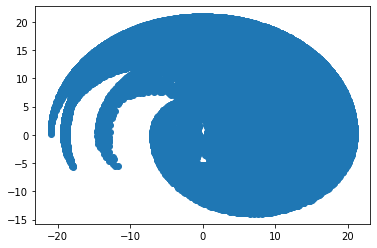

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 76499 samples, validate on 8500 samples
Epoch 1/50
76499/76499 [==============================] - 2s 29us/sample - loss: 0.2324 - acc: 0.9193 - val_loss: 0.0661 - val_acc: 0.9312
Epoch 2/50
   32/76499 [..............................] - ETA: 13s - loss: 0.0616 - acc: 0.9375

/home/pranav/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


76499/76499 [==============================] - 2s 27us/sample - loss: 0.0579 - acc: 0.9353 - val_loss: 0.0478 - val_acc: 0.9431
Epoch 3/50
76499/76499 [==============================] - 2s 28us/sample - loss: 0.0466 - acc: 0.9432 - val_loss: 0.0411 - val_acc: 0.9480
Epoch 4/50
76499/76499 [==============================] - 2s 28us/sample - loss: 0.0408 - acc: 0.9514 - val_loss: 0.0371 - val_acc: 0.9576
Epoch 5/50
76499/76499 [==============================] - 2s 26us/sample - loss: 0.0367 - acc: 0.9589 - val_loss: 0.0319 - val_acc: 0.9639
Epoch 6/50
76499/76499 [==============================] - 2s 25us/sample - loss: 0.0338 - acc: 0.9620 - val_loss: 0.0308 - val_acc: 0.9612
Epoch 7/50
76499/76499 [==============================] - 2s 26us/sample - loss: 0.0317 - acc: 0.9640 - val_loss: 0.0290 - val_acc: 0.9635
Epoch 8/50
76499/76499 [==============================] - 2s 25us/sample - loss: 0.0296 - acc: 0.9664 - val_loss: 0.0303 - val_acc: 0.9696
Epoch 9/50
76499/76499 [==============

In [ ]:
## Visualising generated dataset
data=pd.read_csv('threeLink.csv')
print(data.shape)
plt.scatter(data['xe'],data['ye'])
plt.show()

# splitting training and testing dataset

##training data for inverse kinematics
x = data.iloc[:,3:].values
y =data.iloc[:,0:3].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

#model
classifier = Sequential()
classifier.add(Dense(units = 3,input_dim = 3,kernel_initializer = 'uniform'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 100,kernel_initializer = 'uniform',activation = 'relu'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 3,kernel_initializer = 'uniform',activation='linear'))
classifier.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

#training model
history=classifier.fit(x_train,y_train ,epochs=50, validation_split=0.1, shuffle=True)

#Evaluating model on testing data 
print('Testing the model:\n')
test_loss, test_acc = classifier.evaluate(x_test, y_test)

print('\nTesting Loss = ', test_loss) 
print('Testing Accuracy = ', test_acc)


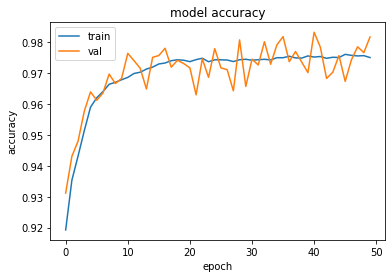

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

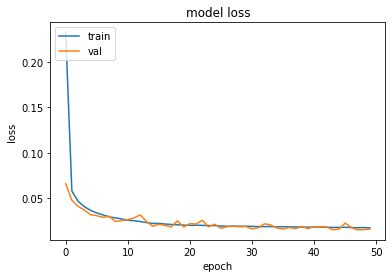

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Visualising or Neural Network
!pip install -q ann_visualizer
from ann_visualizer.visualize import ann_viz;
ann_viz(classifier, title="My neural network")


#Check the folder for "network.gv.pdf" to view the neural network

ModuleNotFoundError: No module named 'graphviz'

# Part 2: **Line**

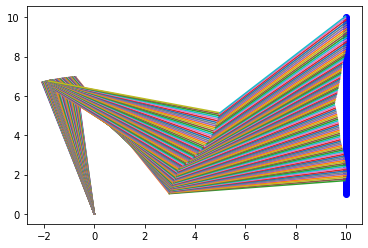

In [ ]:
## trying to plot x=10 line
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import imageio as img
import glob,os

try:  
    os.mkdir('Figure')  
except OSError as error:  
    print(error)

def oneFile():
    with open('one.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)
        arr=np.linspace(1,10,100)
        for j in arr:
            i= 10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)


            xintra= round(l1*m.cos(q1)+ l2*m.cos(q1+q2),2)
            yintra= round(l1*m.sin(q1)+ l2*m.sin(q1+q2),2)
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            if( xintra>0 and yintra>0 and thetae>0 and thetae<90 and q1>0):
                row = [q1,q2,q3,i,j,theta,t1,t2,t3]
                plt.plot(i,j,'bo')
                csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
oneFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'one.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)

ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    fileName = 'Figure/one' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.savefig(fileName)
    images.append(img.imread(fileName))
    c = c+1
    
img.mimsave('Figure/animateone.gif',images) 
import glob, os
for f in glob.glob("Figure/one*.png"):
    os.remove(f)

In [ ]:
## Performance of model for "Line"
from sklearn.metrics import mean_squared_error

data=pd.read_csv('one.csv')

#root mean error
X_true=data['xe']
X_pred=data['t1']
rmse_x=mean_squared_error(X_true,X_pred)

Y_true=data['ye']
Y_pred=data['t2']
rmse_y=mean_squared_error(Y_true,Y_pred) 

print('\nrmse in x = ', rmse_x) 
print('rmse in y = ', rmse_y)

## adjusted rsquared test
regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
print(regressor_OLS.rsquared_adj)
regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
print(regressor_OLS.rsquared_adj)  


rmse in x =  0.059989999999999995
rmse in y =  0.10459672727272727
0.9997612192363979
0.9971583438129468


'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

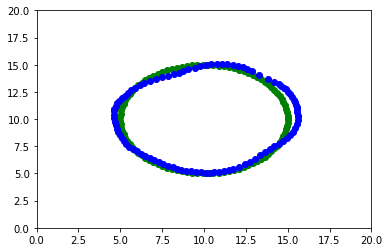

In [ ]:
## trying to plot "Circle"
def circleFile():
    with open('circle.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)
        Xc = 10
        Yc = 10
        r = 5
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            
            ##parametric form of a circle
            
            
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            #plt.xlim([0,20])
            #plt.ylim([0,20])
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
circleFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'circle.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
    
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''

In [ ]:
## Performance of model for "Circle"
from sklearn.metrics import mean_squared_error

data=pd.read_csv('circle.csv')

#rmse
X_true=data['xe']
X_pred=data['t1']
rmse_x=mean_squared_error(X_true,X_pred)

Y_true=data['ye']
Y_pred=data['t2']
rmse_y=mean_squared_error(Y_true,Y_pred) 

print('\nrmse in x = ', rmse_x) 
print('rmse in y = ', rmse_y)

## adjusted rsquared test
regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
print(regressor_OLS.rsquared_adj)
regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
print(regressor_OLS.rsquared_adj) 


rmse in x =  0.23732434170218997
rmse in y =  0.052599937668897895
0.9982008833097055
0.9995271969282624


'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

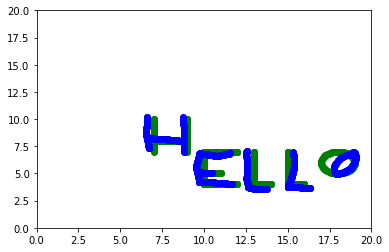

In [ ]:
## trying to plot "HELLO"   

def helloFile():
  with open('hello.csv', 'w') as csvFile:
        row= ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)

        # for H
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 7
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(7,9,100)
        for i in arr:
            j=8
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(7,10,100)
        for j in arr:
            i= 9
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for E
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        arr=np.linspace(10,12,100)
        for i in arr:
            j=7
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,11,100)
        for i in arr:
            j=5
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,12,100)
        for i in arr:
            j=4
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for L
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 13
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(13,14,100)
        for i in arr:
            j=4
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for L
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 15
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(15,16,100)
        for i in arr:
            j=4
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        Xc = 18
        Yc = 6
        r = 1
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
  csvFile.close()
        
    
helloFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'hello.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
import time

#time_start = time.clock()
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
#time_elapsed = (time.clock() - time_start)
#print(time_elapsed)   
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''

In [ ]:
## Performance of Model for "Hello"
from sklearn.metrics import mean_squared_error

data=pd.read_csv('hello.csv')

X_true=data['xe']
X_pred=data['t1']
rmse_x=mean_squared_error(X_true,X_pred)

Y_true=data['ye']
Y_pred=data['t2']
rmse_y=mean_squared_error(Y_true,Y_pred) 

print('\nrmse in x = ', rmse_x) 
print('rmse in y = ', rmse_y)

## adjusted rsquared test
regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
print(regressor_OLS.rsquared_adj)
regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
print(regressor_OLS.rsquared_adj) 


rmse in x =  0.13016214948319463
rmse in y =  0.060136039195330254
0.9992167471457742
0.9984692135060239


'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

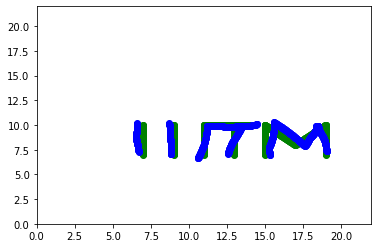

In [ ]:
## trying to plot "IIITM"   

def iiitmFile():
  with open('iiitm.csv', 'w') as csvFile:
        row= ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)

        # for I
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 7
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

       
        # for I
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 9
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        #for I
        
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 11
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
            
        #for T

        arr=np.linspace(7,10,100)
        for j in arr:
            i=13
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
        arr=np.linspace(11,14,100)
        for i in arr:
            j=10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
             #for M

        arr=np.linspace(7,10,100)
        for j in arr:
            i=15
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
        arr=np.linspace(10,8,100)
        for j in arr:
            i=25-j
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
        arr=np.linspace(8,10,100)
        for j in arr:
            i=j+9
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
            
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 19
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
            
            
        

               
  csvFile.close()
        
    
iiitmFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'iiitm.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
import time

#time_start = time.clock()
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,22])
    plt.ylim([0,22])
    plt.plot(point[0],point[1],'bo')
    plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
#time_elapsed = (time.clock() - time_start)
#print(time_elapsed)   
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''